<a href="https://colab.research.google.com/github/Juniorffonseca/processo_seletivo/blob/main/teste_processo_seletivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Traga insumos para validação ou refutação das seguintes hipóteses:
1.1. Ao longo do tempo é possível observar uma mudança na preferência de
escolha de medicamento do médico;
1.2. Existem outros fatores que influenciam na tomada de decisão de qual
medicamento o médico irá prescrever (geográfico e/ou especialidade médica
e/ou temporal);
1.3. Existe uma relação sazonal na escolha do médico pelos medicamentos;
1.4. Existe relação entre tornar-se membro da comunidade e/ou ser visitado com
o número de prescrições para cada um dos medicamentos;
2. Faça um relatório para ser acompanhado semanalmente com os principais
indicadores que julgar relevantes e que demonstre o impacto da comunidade nas
prescrições.


In [55]:
# Carregando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import colormaps as cm
from google.colab import files

In [63]:
# Importando csvs

uploaded = files.upload()

#url = 'https://raw.githubusercontent.com/Juniorffonseca/processo_seletivo/main/medicos.csv?token=GHSAT0AAAAAAB4FDFCP347HLOMLUECMVVYSY6WW2DQ'
#url_2 = 'https://raw.githubusercontent.com/Juniorffonseca/processo_seletivo/main/membros.csv?token=GHSAT0AAAAAAB4FDFCOE72UXJ5I5YR7RSNMY6WRGVQ'
#url_3 = 'https://raw.githubusercontent.com/Juniorffonseca/processo_seletivo/main/prescricoes.csv?token=GHSAT0AAAAAAB4FDFCORFCN6DWXLFVJEEKAY6WW3LA'
#url_4 = 'https://raw.githubusercontent.com/Juniorffonseca/processo_seletivo/main/visitados.csv?token=GHSAT0AAAAAAB4FDFCPUI5VULJ7FMNHJ3YMY6WRHEQ'

#medicos = pd.read_csv(url, sep = ';', encoding='latin-1')
#membros = pd.read_csv(url_2, sep = ';', encoding='latin-1')
#prescricoes = pd.read_csv(url_3, sep = ';', encoding='latin-1')
#visitados = pd.read_csv(url_4, sep = ';', encoding='latin-1')

Saving medicos.csv to medicos (1).csv
Saving membros.csv to membros (1).csv
Saving prescricoes.csv to prescricoes (1).csv
Saving visitados.csv to visitados (1).csv


In [111]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style
#'Solarize_Light2', '_classic_test_patch','_mpl-gallery',
#'_mpl-gallery-nogrid',
#'bmh',
#'classic',
#'dark_background',
#'fast',
#'fivethirtyeight',
#'ggplot',
#'grayscale',
#'seaborn',
#'seaborn-bright',
#seaborn-colorblind',
#seaborn-dark',
#seaborn-dark-palette',
#'seaborn-darkgrid',
#'seaborn-deep',
#'seaborn-muted',
#'seaborn-notebook',
#'seaborn-paper',
#'seaborn-pastel',
#'seaborn-poster',
#'seaborn-talk',
#'seaborn-ticks',
#'seaborn-white',
#'seaborn-whitegrid',
#'tableau-colorblind10'
# check for latest version of Matplotlib

In [64]:
medicos = pd.read_csv('medicos.csv', sep = ';', encoding='latin-1')
membros = pd.read_csv('membros.csv', sep = ';', encoding='latin-1')
prescricoes = pd.read_csv('prescricoes.csv', sep = ';', encoding='latin-1')
visitados = pd.read_csv('visitados.csv', sep = ';', encoding='latin-1')

In [ ]:
prescricoes_agrupado = prescricoes.groupby[prescricoes['Mes_prescricao']]

<ipython-input-387-4fb29e02e6c3>:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


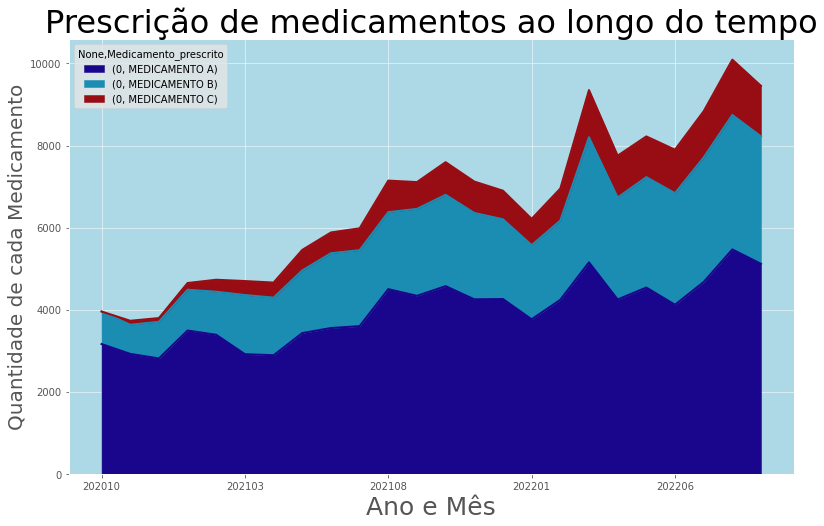

In [387]:

aleatorio = [0, 0, 0]

for i in range(3):
    aleatorio[i] = np.random.rand()

# 0.9817771747683106
# 0.5000000000000000
# 0.20557047808372098

lista = plt.cm.plasma_r([0.9817771747683106,
                         0.19557047808372098,
                         0.63000000000000])

#lista [1] = [0.8, 0.2, 0.3, 1]
lista [1] = plt.cm.ocean(0.7)
lista [2] = plt.cm.Reds(0.9)

#print(aleatorio)

#prescricoes['Mes_prescricao'] = pd.to_datetime(prescricoes['Mes_prescricao'], format='%Y%m').dt.strftime('%Y/%m')

prescricoes_agrupado = prescricoes[['Medicamento_prescrito', 'Mes_prescricao']].value_counts().to_frame()
prescricoes_agrupado = prescricoes_agrupado.reset_index()
prescricoes_agrupado.head().shape

prescricoes_agrupado['Mes_prescricao'] = list(map(str, prescricoes_agrupado['Mes_prescricao']))

prescricoes_agrupado = prescricoes_agrupado.pivot(index='Mes_prescricao', columns='Medicamento_prescrito')
prescricoes_agrupado

prescricoes_agrupado.plot(kind = 'area', stacked = True, figsize = (13, 8), alpha = 1, color = lista)

#plt.colormaps = x

plt.title('Prescrição de medicamentos ao longo do tempo', size = 32)
plt.xlabel('Ano e Mês', size = 25)
plt.ylabel('Quantidade de cada Medicamento', size = 20)

ax = plt.axes()

ax.set_facecolor('lightblue')



plt.show()
